### Generel prep

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS, Legend, LegendItem
from bokeh.layouts import column
from bokeh.palettes import Category20
from bokeh.palettes import TolRainbow
from bokeh.transform import factor_cmap
from bokeh.plotting import output_notebook

from itertools import cycle
# Ensure Bokeh plots are displayed in the notebook
output_notebook()

Loading BokehJS ...

In [3]:
#font_prop = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\source-sans-pro.ttf')
font_reg = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Regular.otf")
font_bold = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Bold.otf")
font_italic = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-It.ttf")
font_light = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Light.otf")
font_legend = font_manager.FontProperties(fname="C:/Windows/Fonts/SourceSansPro-Light.otf", size=12)  # Set the font size here


In [4]:
sbt_palette = [
    "#F26749",  # Crab
    "#F5B7B1",  # Warm Blush
    "#83A5F2",  # Vista blue
    "#204ECF",  # Deep Ocean
    "#EA9836",  # Butterscotch
    # Pastel extended palette
    "#F28C70",  # Lighter Crab
    "#B23A1D",  # Darker Crab
    "#FADBD8",  # Lighter Warm Blush
    "#E5989B",  # Deeper Warm Blush
    "#A1B6F5",  # Lighter Vista Blue
    "#516FD9",  # Midpoint Blue
    "#122E8A",  # Darker Deep Ocean
    "#7C9BF2",  # Muted Vista Blue
    "#A8D5BA",  # Lighter Green (Replacing Lighter Butterscotch)
    "#9C4700",  # More Contrasty Butterscotch
    "#F2E1DC",  # Soft Neutral
    "#F4C2C2",  # Warm Neutral
    "#CBD4F7",  # Soft Cool Tone
    "#BFD0E5",  # Neutral Blue Tint
    "#D47A5F",  # Earthy Warm Blend
    "#8C9EFF",  # Punchy Cool Accent
    "#F7D59C",  # Pale Orange Glow
    "#F7A76C",  # Vibrant Warm
    "#D44A1C",  # Bold Warm Tone
    "#8390F2",  # Cool Complement
    # **Extended Palette**
    "#FE938C",  # Coral Pop
    "#FFC5A1",  # Soft Peach
    "#A9E5BB",  # Mint Pastel
    "#568EA6",  # Ocean Teal
    "#7868E6",  # Royal Lavender
    "#9F89D3",  # Soft Purple
    "#56E39F",  # Vibrant Aqua Green
    "#E8A87C",  # Earthy Sunset
    "#FFAEBC",  # Rosy Glow
    "#1976D2",  # True Deep Blue
    "#FFB347",  # Sunny Orange
    "#E5D4FF",  # Pale Lilac
    "#A6D6A4",  # Muted Sage
    "#D4A5A5",  # Warm Rose Beige
    "#AFCBFF",  # Arctic Blue
    "#FF7777",  # Soft Candy Red
    "#3F88C5",  # Rich Sky Blue
    "#FFD6E0",  # Gentle Pink Wash
    "#1F487E",  # Night Blue

    # **Additional Extended Colors**
    "#FAD4C0",  # Peach Cream
    "#C56E1A",  # Deep Terracotta
    "#8C2D19",  # Burnt Clay
    "#6096BA",  # Cool Sky Blue
    "#9AB87A",  # Fresh Olive Green
    "#FFDAA1",  # Warm Glow
    "#B6C0E0",  # Soft Powder Blue
    "#EAE7AF",  # Muted Sand
    "#5E8098",  # Muted Slate Blue
    "#D1C2F0",  # Misty Lavender
    "#6D9E58",  # Forest Moss
    "#DE8F6E",  # Warm Rust
    "#7FBCD2",  # Bright Aqua
    "#B8860B",  # Golden Brown
    "#E0ADC8",  # Soft Mauve
    "#357F7A",  # Deep Teal
    "#F1C3A0",  # Gentle Orange
]

In [5]:

filepath = r'ByCompany.csv'
Comp = pd.read_csv(filepath, sep=';')
filepath = r'ByTargets.csv'
Targ = pd.read_csv(filepath, sep=';')

In [6]:
#Targ.info()
#Comp.info()
Targ = Targ.copy()
Comp = Comp.copy()

### Categorizing sectors in both Comp and Targ

In [7]:
# Mapping of sectors to categories
sector_category_map = {
    'Ground Transportation - Railroads Transportation': 'Transportation',
    'Semiconductors and Semiconductors Equipment': 'Technology',
    'Air Freight Transportation and Logistics': 'Transportation',
    'Trading Companies and Distributors, and Commercial Services and Supplies': 'Commercial Services',
    'Water Transportation - Water Transportation': 'Transportation',
    'Food and Beverage Processing': 'Food and Beverage',
    'Telecommunication Services': 'Telecommunication',
    'Construction and Engineering': 'Construction',
    'Pharmaceuticals, Biotechnology and Life Sciences': 'Healthcare',
    'Professional Services': 'Professional Services',
    'Containers and Packaging': 'Packaging',
    'Real Estate': 'Real Estate',
    'Consumer Durables, Household and Personal Products': 'Consumer Products',
    'Electric Utilities and Independent Power Producers and Energy Traders (including Fossil, Alternative and Nuclear Energy)': 'Energy',
    'Retailing': 'Retail',
    'Mining - Iron, Aluminum, Other Metals': 'Mining',
    'Textiles, Apparel, Footwear and Luxury Goods': 'Consumer Products',
    'Software and Services': 'Technology',
    'Hotels, Restaurants and Leisure, and Tourism Services': 'Hospitality',
    'Electrical Equipment and Machinery': 'Manufacturing',
    'Food Production - Agricultural Production': 'Food Production',
    'Building Products': 'Construction',
    'Food and Staples Retailing': 'Retail',
    'Automobiles and Components': 'Automotive',
    'Forest and Paper Products - Forestry, Timber, Pulp and Paper, Rubber': 'Forestry and Paper Products',
    'Tobacco': 'Tobacco',
    'Solid Waste Management Utilities': 'Utilities',
    'Chemicals': 'Chemicals',
    'Construction Materials': 'Construction',
    'Technology Hardware and Equipment': 'Technology',
    'Mining - Other (Rare Minerals, Precious Metals and Gems)': 'Mining',
    'Water Utilities': 'Utilities',
    'Homebuilding': 'Construction',
    'Ground Transportation - Highways and Railtracks': 'Transportation',
    'Food Production - Animal Source Food Production': 'Food Production',
    'Healthcare Equipment and Supplies': 'Healthcare',
    'Air Transportation - Airport Services': 'Transportation',
    'Media': 'Media',
    'Banks, Diverse Financials, Insurance': 'Financial Services',
    'Ground Transportation - Trucking Transportation': 'Transportation',
    'Specialized Consumer Services': 'Consumer Services',
    'Specialized Financial Services, Consumer Finance, Insurance Brokerage Firms': 'Financial Services',
    'Healthcare Providers and Services, and Healthcare Technology': 'Healthcare',
    'Water Transportation - Ports and Services': 'Transportation',
    'Air Transportation - Airlines': 'Transportation',
    'Aerospace and Defense': 'Defense',
    'Tires': 'Automotive',
    'Education Services': 'Education',
    'Gas Utilities': 'Utilities'
}

# Function to map sectors to categories
def map_category(sector):
    return sector_category_map.get(sector, 'Unknown')
# Apply the function to the 'sector' column
Targ['sectorCat'] = Targ['sector'].apply(map_category)
Comp['sectorCat'] = Comp['sector'].apply(map_category)
# Display the DataFrame
Targ['sectorCat'].unique()
# Place sectorCat next to sector in the DataFrame
Targ = Targ[['sector', 'sectorCat'] + [col for col in Targ.columns if col not in ['sector', 'sectorCat']]]
Comp = Comp[['sector', 'sectorCat'] + [col for col in Comp.columns if col not in ['sector', 'sectorCat']]]

### Editing Targ df

In [8]:
#make Targ['date_published'] a datetime object
Targ['date_published'] = pd.to_datetime(Targ['date_published'], errors='coerce')
#seperate year from date_published
Targ['Comitted year'] = Targ['date_published'].dt.year
#sort targ by year
Targ = Targ.sort_values(by='Comitted year', ascending=True)
# limit to 2015-2024
Targ = Targ[Targ['Comitted year'].between(2015, 2024)]
#check if year is sorted correctly
Targ['Comitted year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [9]:
# Remove duplicates of stbi_id in Targ to make counting easier
Targ = Targ.drop_duplicates(subset=['company_name'])

### Editing Comp df

In [10]:
Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')
#isolating year in Comp
Comp['year_updated'] = Comp['date_updated'].dt.year
Comp=Comp.sort_values(by='year_updated', ascending=True)
Comp = Comp[Comp['year_updated'].between(2015, 2024)]
#Check if year is sorted correctly
Comp['year_updated'].unique()

C:\Users\Val\AppData\Local\Temp\ipykernel_51836\2918682213.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Comp['date_updated'] = pd.to_datetime(Comp['date_updated'], errors='coerce')


array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [11]:
#group by year_updated and count the number commitment removed
#Comp['year_updated'] = pd.to_numeric(Comp['year_updated'], errors='coerce')

# Prep of DK data
Total amount of companies in denmark (2022) = 417137,
source https://www.dst.dk/da/Statistik/nyheder-analyser-publ/nyt/NytHtml?cid=48768 visited on 08/05/2025

In [12]:
#create dataframe with only locations with denmark
Targ_dk = Targ[Targ['location'].str.contains('Denmark', na=False)]
Comp_dk = Comp[Comp['location'].str.contains('Denmark', na=False)]
Total_comp_dk = 417137

### Prep of Europe data
Total approximate amount of companies in europe (2022) = 5500000 + 3120000 + 1733000 + 32000000 = 42353000, sources https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Business_demography_statistics, https://www.statista.com/topics/10032/companies-in-russia/#editorsPicks,https://www.statista.com/statistics/995354/ukraine-number-business-entities/ and https://www.gov.uk/government/statistics/business-population-estimates-2022/business-population-estimates-for-the-uk-and-regions-2022-statistical-release-html all visited on 08/05/2025



In [13]:
Targ_Europe = Targ[Targ['region'].str.contains('Europe', na=False)]
Comp_Europe = Comp[Comp['region'].str.contains('Europe', na=False)]
Total_comp_Europe = 5500000 + 3120000 + 1733000 + 32000000
Comp_Europe.count()


sector                             5139
sectorCat                          5139
sbti_id                            5139
company_name                       5139
organization_type                  5139
location                           5139
region                             5139
near_term_status                   5139
near_term_target_classification    3507
near_term_target_year              3507
long_term_status                    935
long_term_target_classification     935
long_term_target_year               935
 net_zero_status                   2113
net_zero_year                       959
reason_for_extension_or_removal     565
date_updated                       5139
Unnamed: 16                           0
Unnamed: 17                           0
Unnamed: 18                           0
Unnamed: 19                           0
year_updated                       5139
dtype: int64

### Prep of Global data
Total amount of companies globaly (2022) = 347.29 million,
source https://www.demandsage.com/business-statistics/ visited on 08/05/2025

In [14]:
Targ_Global = Targ.copy()
Comp_Global = Comp.copy()
Total_comp_Global = 347290000
Comp_Global.count()
len(Comp_Global['sector'].unique())
Comp_Global['sectorCat'].unique()

array(['Financial Services', 'Transportation', 'Technology',
       'Real Estate', 'Food and Beverage', 'Commercial Services',
       'Healthcare', 'Mining', 'Consumer Products', 'Energy', 'Retail',
       'Chemicals', 'Automotive', 'Construction', 'Tobacco',
       'Hospitality', 'Utilities', 'Food Production',
       'Professional Services', 'Telecommunication',
       'Forestry and Paper Products', 'Manufacturing', 'Media',
       'Packaging', 'Consumer Services', 'Unknown', 'Defense',
       'Education'], dtype=object)

### Denmark vs Europe vs Global

### Ideas for Characteristics


Sector and Sector Category Breakdown
What to Explore:

Differences in industry composition (e.g., Financial Services, Transportation) among companies in Denmark versus Europe versus globally.

This can reveal whether certain sectors dominate in some regions and if that correlates with their sustainability commitments.

Visualization Options:

Grouped Bar Chart or Pie Charts: Show the percentage of companies in each sector (or sector category) by region.

Stacked Bar Chart: Compare sectors side by side across regions.

3. Near-Term and Long-Term Target Status
What to Explore:

The distribution of near-term statuses (e.g., "Targets set", "Commitment removed") across the regions.

The presence or absence of target years (both near-term and long-term) can indicate commitment intensity and ambition.

Visualization Options:

Stacked Bar Chart: Each bar represents a region, split by the counts of different near-term status categories.

Box/Violin Plots: If you have enough data, plot the distribution of target years per region to see if there are differences in ambition ranges.

pdate Recency and Data Freshness
What to Explore:

The date_updated or year_updated columns can show how recent the data is for each region.

Regions with older data might indicate slower update cycles or less engagement with recent sustainability initiatives.

Visualization Options:

Line Plot or Bar Chart: Show the frequency distribution of updated years across regions.

5. Net Zero and Long-Term Commitments
What to Explore:

How many companies have set long-term targets or net zero goals.

Compare these numbers as a percentage of total companies or as counts to see regional differences in long-term sustainability strategies.

Visualization Options:

Side-by-Side Bar Charts: For each region, show the count (or percentage) of companies with net zero targets.

Dual-Axis Charts: Compare near-term and long-term target adoption within the same graph.

6. Additional Considerations
Company Size or Type: If you have data regarding the size or organization type (e.g., Financial Institution vs. Corporate), plotting these distributions might reveal correlations between company type and commitment levels.

Qualitative Data: Sometimes the reason_for_extension_or_removal column holds qualitative insights. A word cloud or frequency bar chart derived from this text field (after cleaning the data) might highlight common challenges or concerns.



In [15]:
#sorting the number of companies with validated targets away from companies with commited or removed commitment
org_dk = Comp_dk[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_dk = []

# Loop through the rows of the dataset
for index, row in org_dk.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_dk.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_dk = pd.DataFrame(rows_dk)

org_Europe = Comp_Europe[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_europe = []


# Loop through the rows of the dataset
for index, row in org_Europe.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_europe.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_Europe = pd.DataFrame(rows_europe)

org_Global = Comp_Global[['organization_type', 'near_term_status', 'long_term_status', ' net_zero_status', 'year_updated']].reset_index(drop=True)

# Create an empty list to store rows for the result
rows_global = []

# Loop through the rows of the dataset
for index, row in org_Global.iterrows():
    # Check if "Targets set" exists in any of the relevant columns
    if any(status == "Targets set" for status in [row["near_term_status"], row["long_term_status"], row[" net_zero_status"]]):
        # Append the row's relevant data to the list
        rows_global.append({
            "organization_type": row["organization_type"],
            "year_updated": row["year_updated"]
        })

# Convert the list of rows into a new DataFrame
org_sorted_Global = pd.DataFrame(rows_global)

# Filtering companies with year_updated before 2023
filtered_dk = [org for _, org in org_sorted_dk.iterrows() if org["year_updated"] < 2023]
filtered_europe = [org for _, org in org_sorted_Europe.iterrows() if org["year_updated"] < 2023]
filtered_global = [org for _, org in org_sorted_Global.iterrows() if org["year_updated"] < 2023]

# Data
regions = ["Denmark", "Europe", "Global"]
validated_targets = [len(org_sorted_dk), len(org_sorted_Europe), len(org_sorted_Global)]
total_companies = [Total_comp_dk, Total_comp_Europe, Total_comp_Global]
# Companies without validated targets
not_validated = np.array(total_companies) - np.array(validated_targets)


"""
# Plot background color and bar color
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.6
ax.bar(regions, validated_targets, label="Validated Targets", color="green")
ax.bar(regions, not_validated, bottom=validated_targets, label="Not Validated Targets", color="grey")

# Adjust the width of the bars here to change the distance between them
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)

# Plot stacked bars
#bottom_vals = None
#for i, col in enumerate(pivot_data.columns):
#    if bottom_vals is None:
#        bars = ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col)
#        bottom_vals = pivot_data[col]
#    else:
#        ax.bar(pivot_data.index, pivot_data[col], color=sbt_palette[i], zorder=3, width=bar_width, label=col, bottom=bottom_vals)
#        bottom_vals += pivot_data[col]

# Set facecolor
ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("SBTi Validation Distribution by Companies in Denmark, Europe and globally in 2022", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Region", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)
    label.set_size(14)

# Add data labels to the stacked bars
for bar_group in ax.containers:
    for bar in bar_group:
        if bar.get_height() > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f'{int(bar.get_height())}',
                ha='center', va='center', fontsize=14, color="#122E8A", fontproperties=font_bold
            )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
font_legend = font_manager.FontProperties( size=12)  # Set the font size here


# Add legend
#ax.legend(
#    title="SBTi in 2022",
#    loc="upper left",
#    bbox_to_anchor=(1, 1),
#    frameon=False,
#    prop=font_legend,
#    title_fontsize=12
#)

#plt.tight_layout()
#plt.show()"""
not_validated = np.array(total_companies) - np.array(validated_targets)

### Good for the story

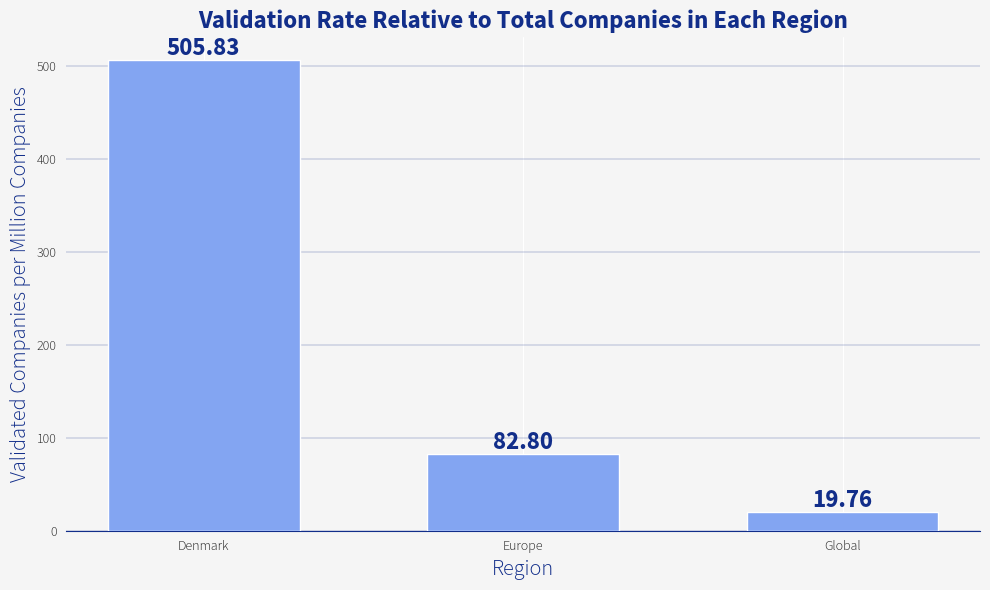

In [16]:
# Convert percentages into "Companies per Million"
validated_per_million = (np.array(validated_targets) / np.array(total_companies)) * 1_000_000


fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them (default is 0.8)
bar_color = "#83A5F2"
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)
bars = ax.bar(regions, validated_per_million, color=bar_color, zorder=3, width=bar_width)

ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("Validation Rate Relative to Total Companies in Each Region", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Validated Companies per Million Companies", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Region", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=20)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Annotate each bar with its value
for bar, value in zip(bars, validated_per_million):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0,  # Offset text slightly above the bar
        f"{value:.2f}",  # Format with thousand separator
        ha="center", va="bottom", fontsize=18, color="#122E8A", fontproperties=font_bold
    )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

plt.tight_layout()
plt.show()


This plot shows the amount of validated companies per million companies in each region

### Good for the story

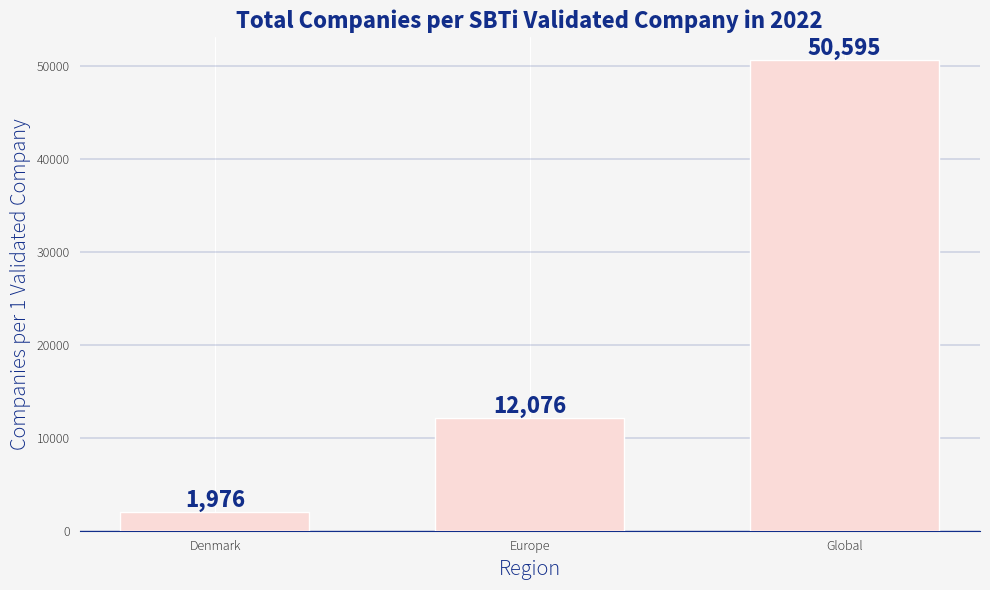

In [17]:


# Compute validation ratio: "1 Validated per X Companies"
validation_ratio = np.array(total_companies) / np.array(validated_targets)

# Plot background color and bar color
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Set fixed plot size (width, height)

# Adjust the width of the bars here to change the distance between them (default is 0.8)
bar_color = "#FADBD8"
bar_width = 0.6  # Change this value to make bars closer (lower value) or farther apart (higher value)
bars = ax.bar(regions, validation_ratio, color=bar_color, zorder=3, width=bar_width)

ax.set_facecolor("#f5f5f5")

# Set title with font properties
ax.set_title("Total Companies per SBTi Validated Company in 2022", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Companies per 1 Validated Company", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Region", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=20)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)

# Annotate each bar with its value
for bar, value in zip(bars, validation_ratio):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value + 0.5,  # Offset text slightly above the bar
        f"{int(value):,}",  # Format with thousand separator
        ha="center", va="bottom", fontsize=18, color="#122E8A", fontproperties=font_bold
    )

# Spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

plt.tight_layout()
plt.show()


This plot shows the amount of companies that are not validated per 1 validated company in a region. On the graph it can see that there is about 2 thousand companies per one validated company in denmark compared to the 12 thousand and 50.6 thousand in europe and globally, but it is worth noting that there is only 460 thousand companies in denmark while there is 30+ million and 320+ million in europe and globally.

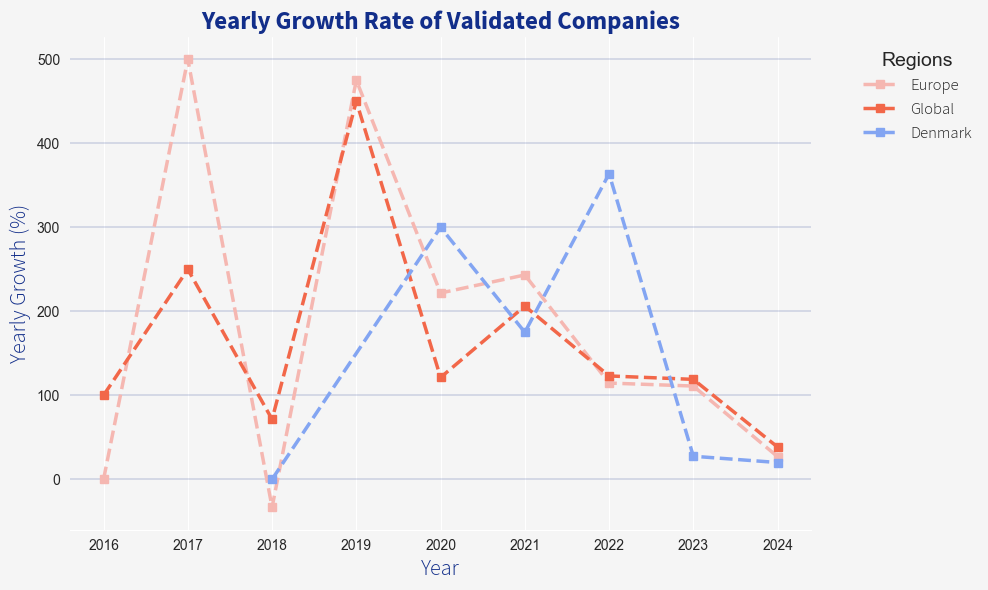

In [38]:
# Assign region labels to datasets
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

Targ_Global.loc[:, "region_source"] = "Global"
Targ_Europe.loc[:, "region_source"] = "Europe"
Targ_dk.loc[:, "region_source"] = "Denmark"
# Remove duplicates from each dataset
Targ_Global_unique = Targ_Global.drop_duplicates(subset="sbti_id")
Targ_Europe_unique = Targ_Europe.drop_duplicates(subset="sbti_id")
Targ_dk_unique = Targ_dk.drop_duplicates(subset="sbti_id")

# Concatenate the unique datasets
df = pd.concat([Targ_Global_unique, Targ_Europe_unique, Targ_dk_unique], ignore_index=True)
df["year_published"] = pd.to_datetime(df["date_published"]).dt.year
# Filter companies with validated targets
validated_df =df

# Group by year and region to count validated companies
validated_growth = validated_df.groupby(["year_published", "region_source"]).size().reset_index(name="count")

# Calculate year-over-year growth percentage
validated_growth["relative_growth"] = validated_growth.groupby("region_source")["count"].pct_change() * 100
region_colors = {"Global": sbt_palette[0], "Europe": sbt_palette[1], "Denmark": sbt_palette[2]}
# Create the plot
fig, axes2 = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))  # Set fixed plot size (width, height)
 # Set axes background color
axes2.set_facecolor("#f5f5f5")  # Set axes background color
# Second subplot: Relative growth percentage
for source in validated_growth["region_source"].unique():
    subset = validated_growth[validated_growth["region_source"] == source]
    axes2.plot(subset["year_published"], subset["relative_growth"], marker="s", linestyle="dashed", linewidth=2.5, color=region_colors[source], label=source)

axes2.set_title("Yearly Growth Rate of Validated Companies", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
axes2.set_xlabel("Year", fontproperties=font_light, fontsize=16, color="#122E8A")
axes2.set_ylabel("Yearly Growth (%)", fontproperties=font_light, fontsize=16, color="#122E8A")


axes2.legend(
    title="Regions",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12,
    frameon=False,
    prop=font_legend,
    title_fontsize=14
)
for ax in axes:

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible("#122E8A")
    ax.grid(True, axis='y', linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)
axes2.spines['top'].set_visible(False)
axes2.spines['right'].set_visible(False)
axes2.spines['left'].set_visible(False)
axes2.spines['bottom'].set_visible("#122E8A")
axes2.grid(True, axis='y', linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

plt.tight_layout()
plt.savefig("../images/validated_growth_plot.png", dpi=300, bbox_inches='tight')
plt.show()

This plot shows the gwroth of validated comapnies over time and their growth rate for each region

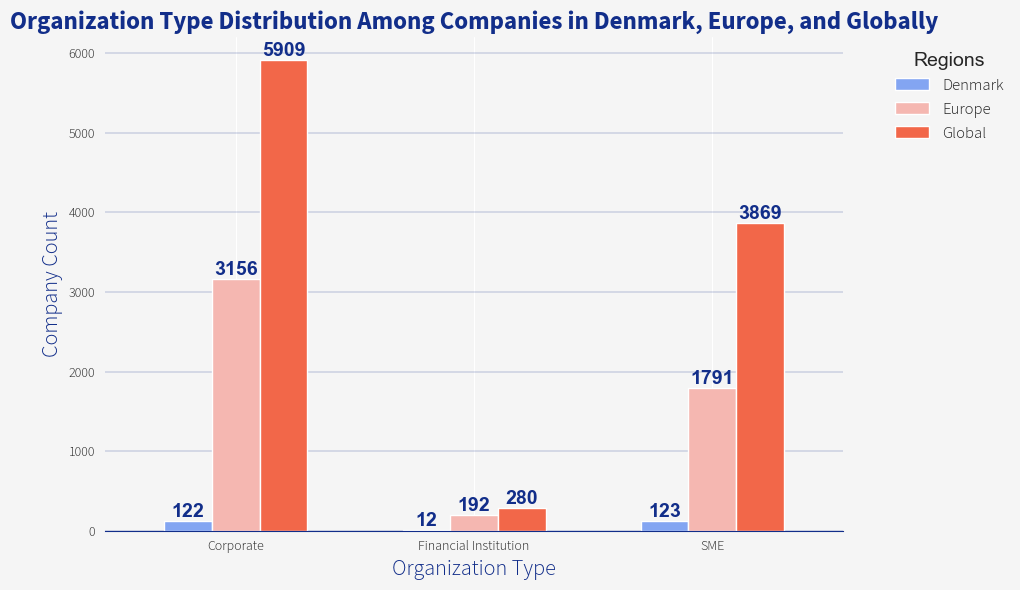

In [19]:
# Assign region labels
Comp_Global.loc[:, "region_source"] = "Global"
Comp_Europe.loc[:, "region_source"] = "Europe"
Comp_dk.loc[:, "region_source"] = "Denmark"

# Combine the datasets
df = pd.concat([Comp_Global, Comp_Europe, Comp_dk])

# Group by sector and data source to count occurrences
organization_type_counts = df.groupby(["organization_type", "region_source"]).size().unstack()
region_colors = {"Global": sbt_palette[0], "Europe": sbt_palette[1], "Denmark": sbt_palette[2]}
# Create figure and axis
fig, ax = plt.subplots(facecolor="#f5f5f5", figsize=(10, 6))
ax.set_facecolor("#f5f5f5")
# Apply custom color palette
color_palette = region_colors
bar_width = 0.6
bars = organization_type_counts.plot(kind="bar", ax=ax, color=color_palette, width=bar_width)

# Add labels on top of each bar
for bar in bars.containers:  # Loop through each bar group
    for rect in bar:  # Each rectangle represents a bar
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height,  # Positioning: center of bar
            f"{int(height)}",  # Convert to integer
            ha="center", va="bottom", fontsize=14, fontweight="bold", color="#122E8A"
        )
# Title and labels with custom fonts
ax.set_title("Organization Type Distribution Among Companies in Denmark, Europe, and Globally", fontproperties=font_bold, fontsize=18, fontweight='bold', color="#122E8A")
ax.set_ylabel("Company Count", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.set_xlabel("Organization Type", fontproperties=font_light, fontsize=16, color="#122E8A")
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=20)

for label in ax.get_xticklabels():
    label.set_fontproperties(font_light)
    label.set_rotation(0)

for label in ax.get_yticklabels():
    label.set_fontproperties(font_light)


# Customize legend with custom font
ax.legend(
    title="Regions",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=12,
    frameon=False,
    prop=font_legend,
    title_fontsize=14
)


# Remove unnecessary spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color("#122E8A")
ax.yaxis.grid(True, linestyle='-', linewidth=0.2, color="#122E8A", zorder=0)

# Adjust layout and display plot
plt.tight_layout()
plt.show()



This plot shows the Organization Types in each region


In [20]:
from math import pi
import pandas as pd
from bokeh.plotting import figure, show, output_file, save
from bokeh.models import ColumnDataSource, HoverTool, Select, CustomJS,Text, Legend, LegendItem
from bokeh.layouts import row, column
from bokeh.palettes import Category20
from bokeh.io import curdoc

# Define your dataset (assuming 'df' includes 'year_updated' column)
df_grouped = df.groupby(["sectorCat", "region_source", "year_updated"]).size().reset_index()
df_grouped.columns = ["sectorCat", "region_source", "year_updated", "count"]  # Renaming the last column

df_combined = df_grouped.groupby(["sectorCat", "region_source"], as_index=False).agg({
    "count": "sum",})
# Calculate percentages within each year
df_combined["percent"] = df_combined.groupby(["region_source"])["count"].transform(lambda x: x / x.sum() * 100)

# Set threshold (e.g., only show percentages above 2.5%)
threshold = 3
df_combined["filtered_percent"] = df_combined["percent"].apply(lambda x: f"{x:.1f}%" if x >= threshold else "")
df_combined["hover_percent"] = df_combined["percent"].apply(lambda x: f"{x:.2f}%" )

# Get all unique sector categories
all_sectors = df_combined["sectorCat"].unique()


# Create a consistent mapping of sectors to colors
sector_colors = {sector: sbt_palette[i % len(sbt_palette)] for i, sector in enumerate(all_sectors)}

# Function to create pie chart data
def create_pie_data(region):
    region_data = df_combined[(df_combined["region_source"] == region)].copy()


    #region_data = region_data.groupby("sectorCat", as_index=False).agg({"count": "sum", "filtered_percent": "mean"})
    region_data = region_data.sort_values(by="count", ascending=False)


    region_data["angle"] = region_data["count"] / region_data["count"].sum() * 2 * pi
    region_data["start_angle"] = region_data["angle"].cumsum().shift(fill_value=0)
    region_data["end_angle"] = region_data["angle"].cumsum()
    wedge_radius = 0.55
    label_radius = 0.45
    region_data["x_label"] = label_radius * np.cos(region_data["start_angle"] + (region_data["angle"] / 2))
    region_data["y_label"] = label_radius * np.sin(region_data["start_angle"] + (region_data["angle"] / 2))

    region_data["color"] = region_data["sectorCat"].map(sector_colors)
    return ColumnDataSource(region_data)

# Create initial pie charts
denmark_source = create_pie_data("Denmark")
europe_source = create_pie_data("Europe")
global_source = create_pie_data("Global")

plot_with =660
plot_height = 660
# Function to create pie chart
def create_pie_chart(title, source):
    p = figure(title=title, width=plot_with, height=plot_height, toolbar_location=None, tools="",x_range=(-0.525, 1))
    p.wedge(x=0, y=0, radius=0.5,
            start_angle="start_angle", end_angle="end_angle",
            line_color="white", fill_color="color", legend_field =  "sectorCat",  source=source)

    hover = HoverTool(tooltips=[("Sector", "@sectorCat"), ("Count", "@count"), ("Percent", "@hover_percent")])
    p.add_tools(hover)

    #p.add_glyph(source, Text(x="x_label", y="y_label", text="filtered_percent",
    # text_align="center", text_baseline="middle", text_color="black", text_font_size="8pt"))
    #p.add_layout(p.legend[0], "left")
    #p.legend.location = "top_right"  # Change this to another position if needed


    # Remove background and grid
    p.background_fill_color = "#f5f5f5"
    p.border_fill_color ="#f5f5f5"
    p.axis.visible = False
    p.grid.visible = False

    return p

# Create pie charts
denmark_pie = create_pie_chart("Denmark", denmark_source)
europe_pie = create_pie_chart("Europe", europe_source)
global_pie = create_pie_chart("Global", global_source)
legend_font_size = f"{max(plot_with, plot_height) // 50}px"

for p in [denmark_pie, europe_pie, global_pie]:
    p.legend.title = "Sectors"  # Optional: add a title for clarity
    p.legend.title_text_font = "Source Sans Pro"
    p.legend.title_text_font_size = "12pt"
    #p.legend.label_text_font_size = "10pt"  # Prevents the legend from growing too large
    p.legend.label_text_font_size = legend_font_size
    p.legend.label_text_color = "black"
    p.legend.label_text_font = "Source Sans Pro"
    p.legend.spacing = 0  # Reduces excessive spacing between items
    p.title.text_font = "Source Sans Pro"
    p.title.text_color = "#122E8A"
    p.title.text_font_size = "18pt"

# Arrange layout with dropdown + pie charts
layout = column(row(denmark_pie, europe_pie, global_pie), sizing_mode="scale_both")
#output_file("../InteractiveGraphs/comparison_plot.html")
#save(layout)
# Show the figure
show(layout)
#curdoc().add_root(layout)


This plot shows all the sector categories and how many companies there are per sector category with a validated target in each region